In [1]:
%matplotlib ipympl
import numpy as np
import sys

# setting path for mask_utils package
sys.path.append('..')
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def read_transmission_data(file_path):
    """
    Reads energy and transmission data from a file, skipping the first two header lines.
    
    Args:
        file_path (str): The path to the .dat file.
        
    Returns:
        tuple: A tuple containing two lists: (energies, transmissions)
    """
    energies = []
    transmissions = []

    try:
        with open(file_path, 'r') as file:
            # Skip the first two header lines
            next(file)
            next(file)

            for line in file:
                # Strip whitespace and split by spaces
                parts = line.strip().split()
                
                # Ensure the line has at least two columns of data
                if len(parts) >= 2:
                    try:
                        energy_val = float(parts[0])
                        trans_val = float(parts[1])
                        
                        energies.append(energy_val)
                        transmissions.append(trans_val)
                    except ValueError:
                        # Skip lines that don't contain valid numbers
                        continue
                        
        return np.array(energies), np.array(transmissions)

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return np.array([]), np.array([])

# Dead layers:
* MLI
    * 150 nm SiO2
    * 300 nm Al
    * 12.5 um Kapton
* MMOD Shield
    * 15 um PP (or 25 um Be)
* SDD dead layers
    * 540 nm SiO2, 100% filling factor
    * 500 nm Al, 93% filling factor
    * 100 nm SiO2, 100% filling factor
    * 500nm Si, 100% filling factor
    * 3.5um Si, 17% filling factor

In [3]:
#All files downloaded from https://henke.lbl.gov/optical_constants/filter2.html
# Thickness: 0.1 um
# Energy range from 1000 eV to 30000 eV, 1000 steps

file_Al     = r"F:\CodedMasks\mask_050_1040x17\Dead Layers\Al_100nm.dat"
file_Kapton = r"F:\CodedMasks\mask_050_1040x17\Dead Layers\Kapton_100nm.dat"
file_PP     = r"F:\CodedMasks\mask_050_1040x17\Dead Layers\PP_100nm.dat"
file_Be     = r"F:\CodedMasks\mask_050_1040x17\Dead Layers\Be_100nm.dat"
file_SiO2   = r"F:\CodedMasks\mask_050_1040x17\Dead Layers\SiO2_100nm.dat"
file_Si     = r"F:\CodedMasks\mask_050_1040x17\Dead Layers\Si_100nm.dat"

In [4]:
ene, Al_trans = read_transmission_data(file_Al)
ene, Kapton_trans = read_transmission_data(file_Kapton)
ene, PP_trans = read_transmission_data(file_PP)
ene, Be_trans = read_transmission_data(file_Be)
ene, SiO2_trans = read_transmission_data(file_SiO2)
ene, Si_trans = read_transmission_data(file_Si)

In [5]:
#Transmission of dead layers
MLI_trans = pow(SiO2_trans, 1.5) * pow(Al_trans, 3) * pow(Kapton_trans, 125) #150nm SiO2 + 300nm Al + 12.5um Kapton
MMOD_trans = pow(PP_trans, 150) #15um PP
#MMOD_trans = pow(Be_trans, 250) #25um Be

SDD_SiO2_1_trans = pow(SiO2_trans, 5.4)      #540nm SiO2, 100%
SDD_Al_trans     = pow(Al_trans, 5) * 0.93  + (1-0.93) #500nm Al, 93% filling factor
SDD_SiO2_2_trans = pow(SiO2_trans, 1)        #100nm SiO2, 100%
SDD_Si_1_trans   = pow(Si_trans, 5)         #500nm Si, 100%
SDD_Si_2_trans   = pow(Si_trans, 35) * 0.17 + (1-0.17) #3.5um Si, 17% filling factor

SDD_trans = SDD_SiO2_1_trans * SDD_Al_trans * SDD_SiO2_2_trans * SDD_Si_1_trans * SDD_Si_2_trans

Tot_trans = MLI_trans * MMOD_trans * SDD_trans


#SDD bulk quantum efficiency
SDD_qe = (1-pow(Si_trans, 4500)) #450um Si


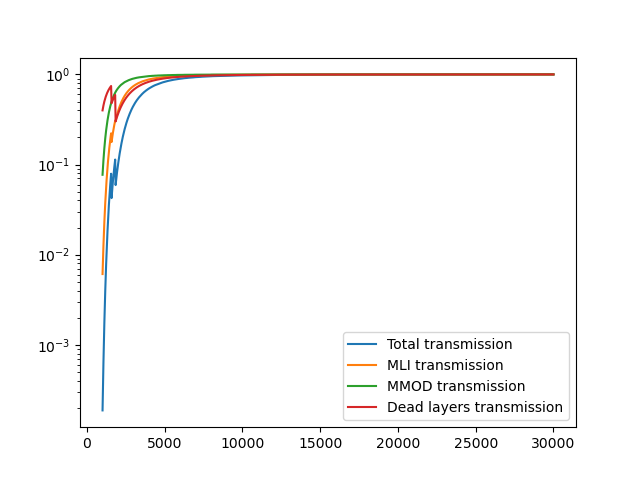

In [6]:
plt.figure()
plt.plot(ene, Tot_trans, label="Total transmission")
plt.plot(ene, MLI_trans, label="MLI transmission")
plt.plot(ene, MMOD_trans, label="MMOD transmission")
plt.plot(ene, SDD_trans, label="Dead layers transmission")
plt.yscale('log')
plt.legend()
plt.show()

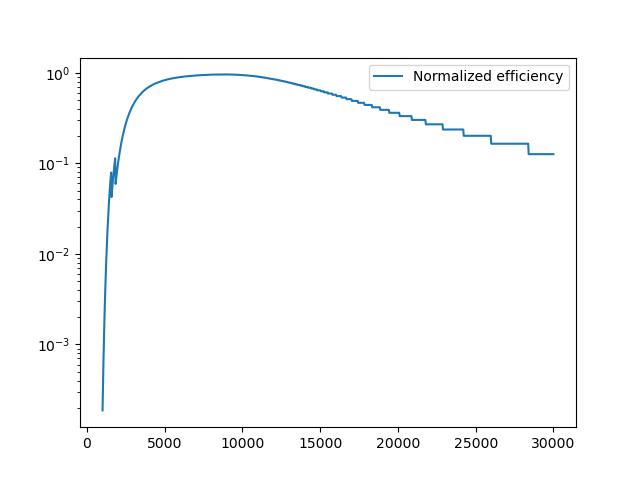

In [7]:
plt.figure()
plt.plot(ene, Tot_trans * SDD_qe, label="Normalized efficiency")
plt.yscale('log')
plt.legend()
plt.show()